In [513]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import seaborn as sns

In [514]:
random_seed = 42
tree_metrics = {}
plt.style.use("seaborn")

In [515]:
# Reading the file
df = pd.read_csv("heartDataSet.csv")

In [516]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


- maybe adding a little description about the columns
- the meaning of target, what does 0 and 1 stand for

## Assumptions:
- The data is cleaned, so we don't need to do data manipulation to clean it

### Default (without pruning)

In [517]:
# split the dataset to 'Features' and 'target'
X = df.drop("target", axis=1)
y = df["target"]
print(X.shape, y.shape)

(303, 13) (303,)


In [518]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [519]:
clf_dt = DecisionTreeClassifier(random_state=random_seed)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

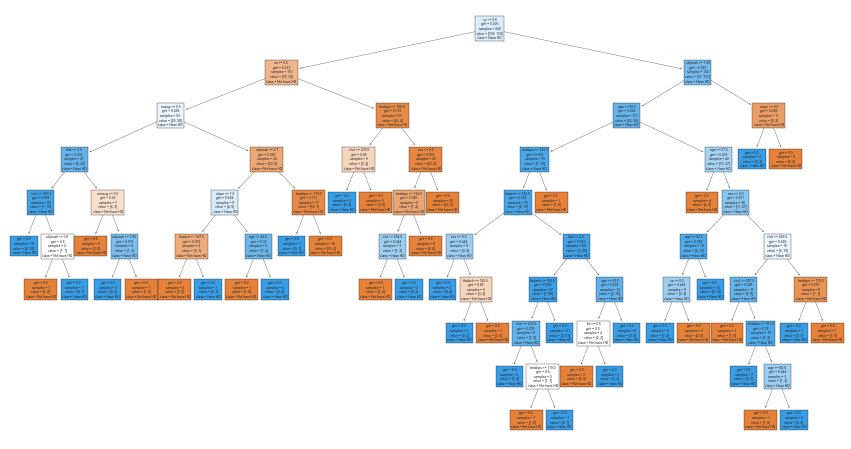

In [520]:
# The size of the figure
plt.figure(figsize=(15, 8))
# '0' in the target represent not having HD, while '1' represent having HD
plot_tree(clf_dt, feature_names=X.columns, class_names=["Not have HD", "Have HD"], filled=True)
plt.show()

In [521]:
# Metrics
dt_prediction = clf_dt.predict(X_test)
accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
tree_metrics["default"] = [accuracy, precision, recall]
print(accuracy, precision, recall)

0.7540983606557377 0.84 0.65625


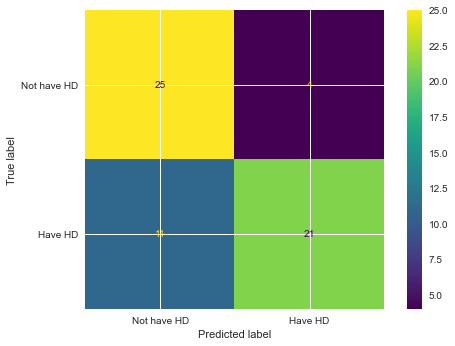

In [522]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Not have HD", "Have HD"])
plt.show()

- maybe adding a little describtion or explnation about the different of `accuracy`, `precision`, and `recall` 

### Cost Complexity Path (Pruning)
[sklearn documentation for information](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

In [523]:
ccp_alphas = clf_dt.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"] # list of possible alphas
ccp_alphas

array([0.        , 0.00270649, 0.00371901, 0.00392562, 0.00519865,
       0.00529773, 0.00608565, 0.00612182, 0.00619835, 0.0072314 ,
       0.00725244, 0.00739452, 0.0074224 , 0.00777832, 0.0079693 ,
       0.01165114, 0.01199988, 0.01352367, 0.0145246 , 0.01509973,
       0.01634212, 0.03374656, 0.03733957, 0.04763689, 0.11152358])

In [524]:
# find the best ccp alpha that maximize the accuracy
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=random_seed, ccp_alpha=alpha)
    clf_dt.fit(X_train, y_train)
    train_scores.append([alpha, clf_dt.score(X_train, y_train)]) # append the 'accuracy' score of training set
    test_scores.append([alpha, clf_dt.score(X_test, y_test)])

In [525]:
train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

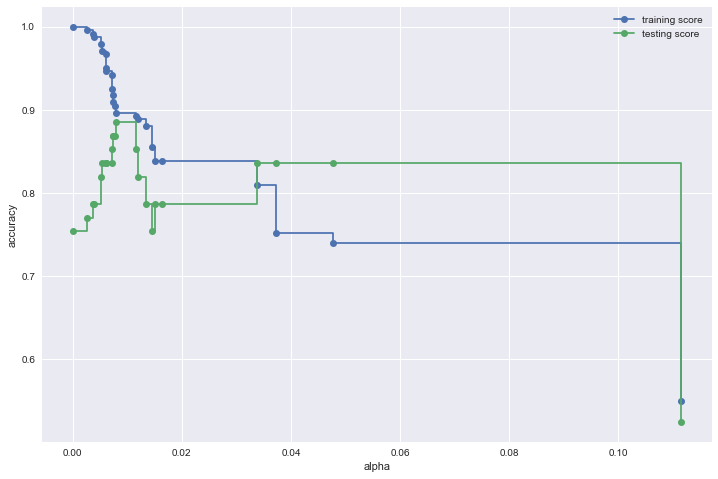

In [526]:
plt.figure(figsize=(12, 8))
plt.plot(ccp_alphas, train_scores[:, 1], label="training score", drawstyle="steps-post", marker="o")
plt.plot(ccp_alphas, test_scores[:, 1], label="testing score", drawstyle="steps-post", marker="o")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
plt.show()

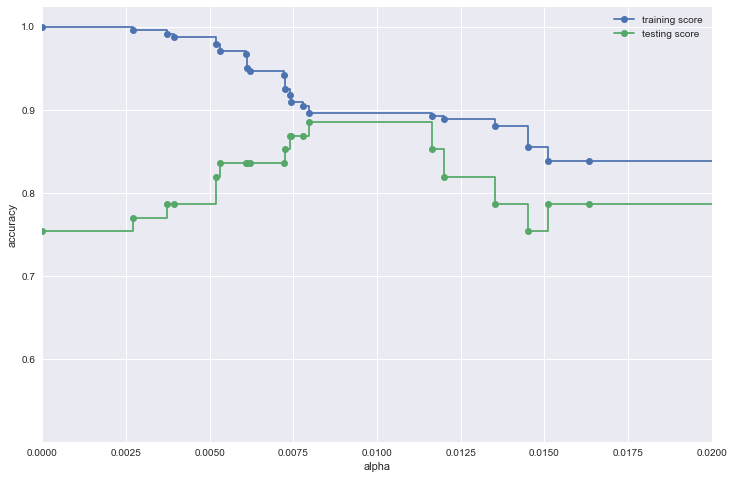

In [527]:
plt.figure(figsize=(12, 8))
plt.plot(ccp_alphas, train_scores[:, 1], label="training score", drawstyle="steps-post", marker="o")
plt.plot(ccp_alphas, test_scores[:, 1], label="testing score", drawstyle="steps-post", marker="o")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.legend()
# plt.xticks([0.00, 0.01, /0.015, 0.02, 0.025])
plt.xlim([0.00, 0.020])
plt.show()

In [547]:
# best_alpha = test_scores[np.argmax(test_scores[:, 1]), 0]
best_alpha = 0.0077
clf_dt = DecisionTreeClassifier(random_state=random_seed, ccp_alpha=best_alpha)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0077, random_state=42)

In [548]:
# Metrics
dt_prediction = clf_dt.predict(X_test)
accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
tree_metrics["ccp"] = [accuracy, precision, recall]
print(accuracy, precision, recall)

0.8688524590163934 0.9 0.84375


<Figure size 576x396 with 0 Axes>

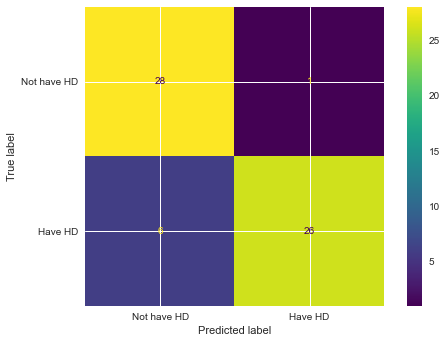

In [545]:
plt.figure()
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Not have HD", "Have HD"])
plt.show()

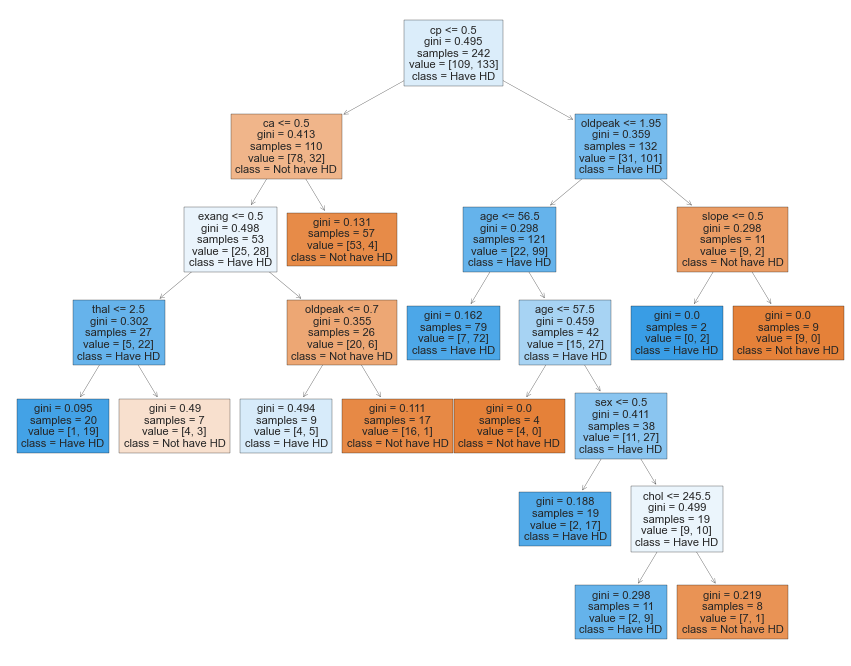

In [531]:
# The size of the figure
plt.figure(figsize=(15, 12))
# '0' in the target represent not having HD, while '1' represent having HD
plot_tree(clf_dt, feature_names=X.columns, class_names=["Not have HD", "Have HD"], filled=True)
plt.show()

### Cross Validation
Optimaiztion to find the best training set with ccp

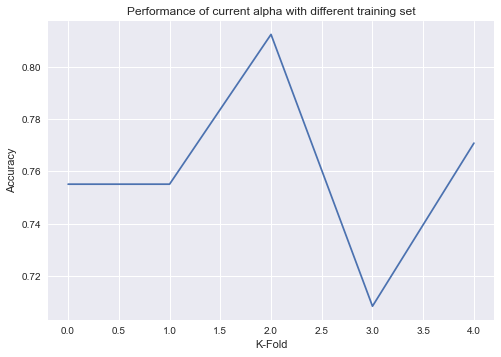

In [546]:
clf_dt = DecisionTreeClassifier(random_state=random_seed, ccp_alpha=best_alpha)

scores = cross_val_score(clf_dt, X_train, y_train, scoring="accuracy", cv=5)
plt.plot(np.array(range(5)), scores)
plt.xlabel("K-Fold")
plt.ylabel("Accuracy")
plt.title("Performance of current alpha with different training set")
plt.show()

In [533]:
scores

array([0.75510204, 0.75510204, 0.8125    , 0.70833333, 0.77083333])

In [534]:
alphas_list = []
for alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=random_seed, ccp_alpha=alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, scoring="accuracy", cv=5)
    alphas_list.append([alpha, np.mean(scores)])

alphas_df = pd.DataFrame(alphas_list, columns=["Alpha", "Mean"])
alphas_df.sort_values("Mean", ascending=False).head()

,Alpha,Mean
14,0.007969,0.760374
16,0.012000,0.760204
15,0.011651,0.756122
4,0.005199,0.751956
5,0.005298,0.751956


In [535]:
best_alpha = float(alphas_df.sort_values("Mean", ascending=False).head(1)["Alpha"])
best_alpha

0.007969303423848877

In [536]:
clf_dt = DecisionTreeClassifier(random_state=random_seed, ccp_alpha=best_alpha)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.007969303423848877, random_state=42)

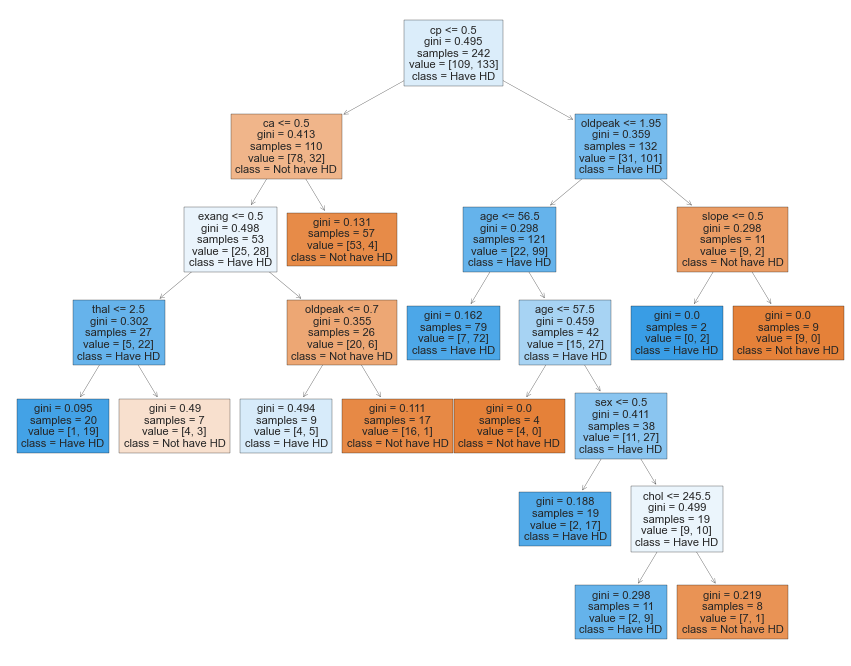

In [537]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, feature_names=X.columns, class_names=["Not have HD", "Have HD"], filled=True)
plt.show()

In [538]:
dt_prediction = clf_dt.predict(X_test)
accuracy = accuracy_score(y_test, dt_prediction)
precision = precision_score(y_test, dt_prediction)
recall = recall_score(y_test, dt_prediction)
tree_metrics["ccp_cross_validation"] = [accuracy, precision, recall]
print(accuracy, precision, recall)

0.8852459016393442 0.9629629629629629 0.8125


<Figure size 576x396 with 0 Axes>

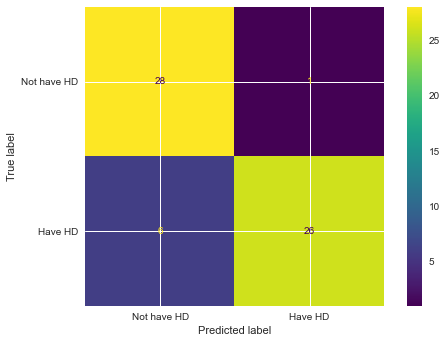

In [539]:
plt.figure()
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Not have HD", "Have HD"])
plt.show()

In [540]:
tree_metrics.values()

dict_values([[0.7540983606557377, 0.84, 0.65625], [0.8852459016393442, 0.9629629629629629, 0.8125], [0.8852459016393442, 0.9629629629629629, 0.8125]])

In [541]:
tree_metrics
tree_df = pd.DataFrame(tree_metrics.values(), columns=["Accuracy", "Percision", "Recall"], index=tree_metrics.keys())
tree_df

,Accuracy,Percision,Recall
default,0.754098,0.840000,0.65625
ccp,0.885246,0.962963,0.81250
ccp_cross_validation,0.885246,0.962963,0.81250


Text(0.5, 1.0, 'Recall')

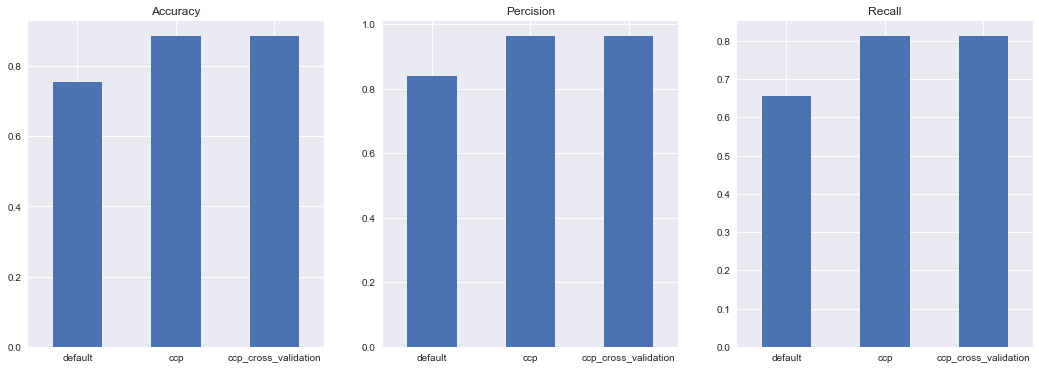

In [542]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

tree_df["Accuracy"].plot(kind="bar", ax=axes[0], rot=0)
axes[0].set_title("Accuracy")
# axes[0].set_xticks(["Default Tree", "CCP Tree", "CCP Tree Cross Val"])
tree_df["Percision"].plot(kind="bar", ax=axes[1], rot=0)
axes[1].set_title("Percision")
tree_df["Recall"].plot(kind="bar", ax=axes[2], rot=0)
axes[2].set_title("Recall")